# Model 5

## Data preprocessing

In [1]:
# Setup
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

2023-08-22 03:17:43.502786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Loading the MATLAB files.
xs = loadmat('xs_all.mat')
tau = loadmat('tau_all.mat')

In [3]:
def pre_processing(xs, tau, n_samples=1000, xs_name='xs_all', tau_name='tau_all'):

    tau_all = tau['tau_all'].squeeze()
    xs_all = xs['xs_all'].squeeze()

    # Normalized
    tau_all = np.array([normalize(i.T, axis=0) for i in tau_all])
    xs_all = np.array([normalize(i.T, axis=0) for i in xs_all])

    # tau_all = np.array([i.T for i in tau_all])
    # xs_all = np.array([i.T for i in xs_all])

    return xs_all, tau_all

In [4]:
xs_all, tau_all = pre_processing(xs,tau)

## Creating the Model

In [5]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(xs_all,
                                                    tau_all,
                                                    test_size=0.2,
                                                    shuffle=True)

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

2023-08-22 03:18:04.387290: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-22 03:18:04.392987: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-22 03:18:04.418738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 03:18:04.419037: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-22 03:18:04.419083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-22 03:18:04.449687: I tensorflow/stream_executor/platform/de

In [6]:
def create_model(X_train, y_train, n_epochs=10):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(20001,12)),
        tf.keras.layers.Dense(128, activation='linear'),
        tf.keras.layers.Dense(4, activation='linear')
    ])

    model.compile(loss=tf.keras.losses.mean_absolute_error,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mse'])

    history = model.fit(X_train,
                        y_train,
                        epochs=n_epochs,
                        use_multiprocessing=True)

    return model, history

In [7]:
model, history = create_model(X_train, y_train, n_epochs=8)

2023-08-22 03:18:07.071309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-08-22 03:18:07.081830: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2689000000 Hz


Epoch 1/8


2023-08-22 03:18:07.493656: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 61443072 exceeds 10% of free system memory.
2023-08-22 03:18:07.493656: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 61443072 exceeds 10% of free system memory.
2023-08-22 03:18:07.552445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


25/25 [==============================] - 3s 105ms/step - loss: 0.0049 - mse: 6.9002e-05
Epoch 2/8
25/25 [==============================] - 3s 105ms/step - loss: 0.0012 - mse: 1.9675e-05
Epoch 3/8
25/25 [==============================] - 3s 103ms/step - loss: 9.2181e-04 - mse: 1.4439e-05
Epoch 4/8
25/25 [==============================] - 2s 97ms/step - loss: 8.8853e-04 - mse: 1.3819e-05
Epoch 5/8
25/25 [==============================] - 3s 100ms/step - loss: 8.8638e-04 - mse: 1.3752e-05
Epoch 6/8
25/25 [==============================] - 3s 101ms/step - loss: 9.9063e-04 - mse: 1.3745e-05
Epoch 7/8
25/25 [==============================] - 2s 100ms/step - loss: 0.0010 - mse: 1.3315e-05
Epoch 8/8
25/25 [==============================] - 2s 94ms/step - loss: 8.5482e-04 - mse: 1.2821e-05


In [11]:
def plot_loss_function(history, save='no', scilimits=(-2,2)):

    sns.set_theme(style='darkgrid', palette='bright')
    fig, ax = plt.subplots(figsize=(5,3))

    t = np.linspace(1,len(history.history['loss']),len(history.history['loss']))

    ax.plot(t, history.history['loss'])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.ticklabel_format(style='sci',
                        scilimits=scilimits,
                        useMathText=True)
    
    if save == 'yes':
        fig.savefig('loss.pgf', backend='pgf')

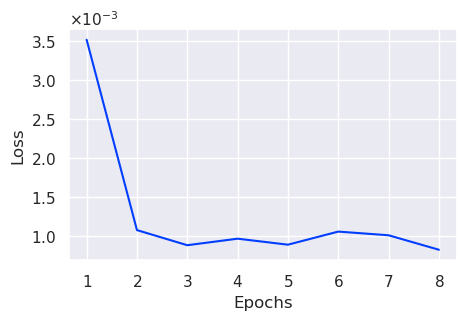

In [12]:
plot_loss_function(history)

In [13]:
# Testing the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 45ms/step - loss: 5.8105e-04 - mse: 1.2191e-05


[0.0005810527363792062, 1.2191466339572798e-05]

In [14]:
# model.save('model_nn')

In [15]:
y_test_0 = model.predict(X_test[100])

In [16]:
pd.DataFrame(y_test[100])

,0,1,2,3
0,0.007067,0.000000,0.000000,0.000000e+00
1,0.009444,0.000000,0.000000,-9.147060e-02
2,0.009444,-0.029972,0.421057,-9.147060e-02
3,0.009435,-0.030119,0.420799,-9.107067e-02
4,0.009425,-0.030012,0.372936,-9.066281e-02
...,...,...,...,...
19996,0.007068,-0.000213,0.000047,-3.090434e-07
19997,0.007068,-0.000213,0.000047,-3.086120e-07
19998,0.007068,-0.000214,0.000047,-3.081794e-07
19999,0.007068,-0.000214,0.000047,-3.077456e-07


In [17]:
pd.DataFrame(y_test_0)

,0,1,2,3
0,0.010355,-0.044502,0.004359,-0.059678
1,0.010355,-0.044502,0.004359,-0.059678
2,0.010400,-0.044660,0.004209,-0.059547
3,0.010425,-0.043916,0.003793,-0.063195
4,0.010433,-0.043215,0.003394,-0.066806
...,...,...,...,...
19996,0.007663,-0.001338,0.000084,0.000349
19997,0.007663,-0.001339,0.000083,0.000349
19998,0.007664,-0.001340,0.000083,0.000348
19999,0.007664,-0.001341,0.000083,0.000348


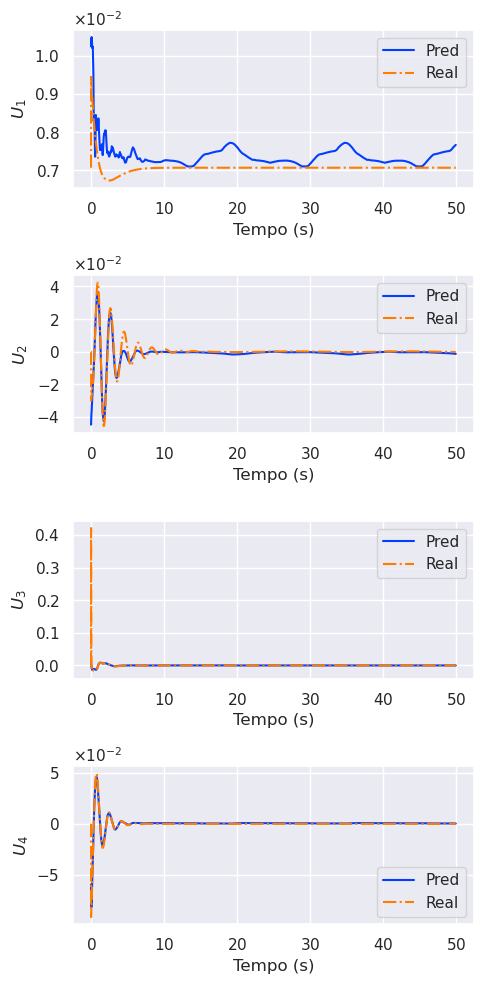

In [18]:
fig, ax = plt.subplots(4,1, figsize=(5,10))

t = np.linspace(0,50,20001)

for i in range(4):
    ax[i].set_xlabel('Tempo (s)')
    ax[i].set_ylabel(f'$U_{i+1}$')
    ax[i].plot(t, y_test_0[:,i], label='Pred')
    ax[i].plot(t, y_test[100][:,i], label='Real', ls='-.')
    ax[i].legend(loc='best')
    ax[i].ticklabel_format(style='sci',
                           scilimits=(-2,2),
                           useMathText=True)
    
fig.tight_layout()
fig.savefig('model.pgf', backend='pgf')